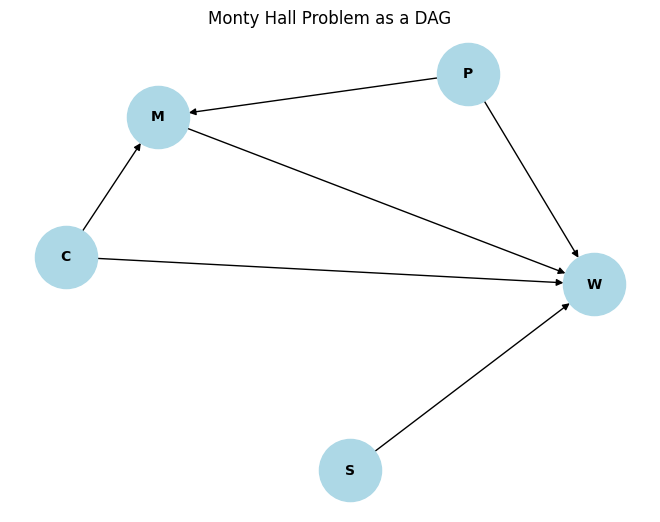

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes representing the variables
G.add_nodes_from(["C", "P", "M", "S", "W"])

# Add edges representing dependencies
G.add_edges_from([
    ("C", "M"),  # Car's location influences Monty's choice
    ("P", "M"),  # Player's initial choice influences Monty's choice
    ("M", "W"),  # Monty's choice influences win status 
    ("C", "W"),  # Car's location influences win status
    ("P", "W"),  # Player's initial choice influences win status
    ("S", "W")   # Player's strategy influences win status
])

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold')
plt.title("Monty Hall Problem as a DAG")
plt.show()

In [2]:
import numpy as np
import pandas as pd

def simulate_monty_hall(num_simulations=1000):
    # Initialize lists to store the results
    car_locations = []
    player_choices = []
    monty_choices = []
    player_strategies = []
    wins = []

    for _ in range(num_simulations):
        # Randomly assign the car to one of the three doors
        car_location = np.random.choice([1, 2, 3])
        car_locations.append(car_location)

        # Player randomly chooses one of the three doors
        player_choice = np.random.choice([1, 2, 3])
        player_choices.append(player_choice)

        # Monty opens a door that is neither the player's choice nor the car's location
        possible_monty_choices = [door for door in [1, 2, 3] if door != player_choice and door != car_location]
        monty_choice = np.random.choice(possible_monty_choices)
        monty_choices.append(monty_choice)

        # Player's strategy: 0 for stay, 1 for switch
        player_strategy = np.random.choice([0, 1])
        player_strategies.append(player_strategy)

        # Determine if the player wins
        if player_strategy == 0:  # Stay
            final_choice = player_choice
        else:  # Switch
            final_choice = [door for door in [1, 2, 3] if door != player_choice and door != monty_choice][0]

        win = 1 if final_choice == car_location else 0
        wins.append(win)

    # Create a DataFrame to store the results
    data = pd.DataFrame({
        'Car Location': car_locations,
        'Player Choice': player_choices,
        'Monty Choice': monty_choices,
        'Player Strategy': player_strategies,
        'Win': wins
    })

    return data

# Generate the data
monty_hall_data = simulate_monty_hall(1000)

# Display the first few rows of the data
print(monty_hall_data.head())

   Car Location  Player Choice  Monty Choice  Player Strategy  Win
0             3              1             2                1    1
1             1              2             3                0    0
2             2              1             3                1    1
3             2              3             1                0    0
4             3              1             2                0    0


## Logistic Regression

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming 'monty_hall_data' is your DataFrame from the previous simulation
# Select features and target variable
features = ['Player Choice', 'Player Strategy']  # Example of potential features
target = 'Win'

# Split the data into training and testing sets
X = monty_hall_data[features]
y = monty_hall_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the results for the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Coefficients of the model
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Accuracy: 0.67
Confusion Matrix:
[[69 24]
 [42 65]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.74      0.68        93
           1       0.73      0.61      0.66       107

    accuracy                           0.67       200
   macro avg       0.68      0.67      0.67       200
weighted avg       0.68      0.67      0.67       200

Coefficients: [[5.37318554e-04 1.41788047e+00]]
Intercept: [-0.72225936]
